<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/03_08_email_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 03_08_email

Standard imports

In [41]:
import numpy as np
import scipy.stats
import pandas as pd
import os

In [2]:
os.chdir('sample_data')

In [40]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

### How I converted my mailbox.

In [6]:
mbox = mailbox.mbox('Sent.mbox')
mbox = mailbox.mbox('Sent.mbox')

The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [7]:
mbox[0].keys()

KeyError: ignored

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [9]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

## Moving on!

In [11]:
messages = pd.read_csv('mbox-anonymized.csv')

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


In [13]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [14]:
# first row from 'from' column
messages['from'][0]
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [16]:
re.search('<(.+)>',messages['from'][0])
re.search('<(.+)>',messages['from'][0])

<_sre.SRE_Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [17]:
# '.' matches any character and the '+' matches one or more of what came before it. need to learn more about regular expression
# essentially, every character before the '.' is getting matched in the email address.
# group 0 contains the entire matched expression
re.search('<(.+)>',messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [ ]:
re.search('<(.+)>',messages['from'][0]).group(1)
# group(1) just matches everything inside the <>

'Michele.Vallisneri@jpl.nasa.gov'

In [19]:
# won't work. need to write a stupid function as below
re.search('<(.+)>','Michele.Vallisneri@jpl.nasa.gov'.group(1)

SyntaxError: ignored

In [22]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)

    if match is None:
        return raw
    else:
        return match.group(1)

# essentially, the same as above. "raw" is the email. if no match, return email.
# if match, return the email address

In [ ]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [23]:
#clean_address is the function as written above
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [ ]:
# this stupid thing returns an error but I don't know why 
messages['from'] = messages['from'].apply(clean_address)

TypeError: expected string or bytes-like object

In [24]:
# we have to debug to figure out why
%debug
# 1st time debugging. had user input. I typed "up" to see the issue
# I "print(raw)" because that was the error. I was supposed to get nan
# error, but instead it said it was a NameError. um, no idea.

> <ipython-input-20-f93f2c783598>(7)clean_address()
      5         return raw
      6     else:
----> 7         return match.group(1)
      8 
      9 # essentially, the same as above. "raw" is the email. if no match, return email.

ipdb> up
> <ipython-input-21-580cb08b29a7>(1)<module>()
----> 1 clean_address(messages['from'][0])

ipdb> print(raw)
*** NameError: name 'raw' is not defined
ipdb> quit


In [26]:
'''
Because we identified the issue as "nan", we're applying the same function as
above but dropping the nan first. then, we apply function. we're also going to
apply it to the to column as well
'''
messages['from'] = messages['from'].dropna().apply(clean_address)
messages['to'] = messages['to'].dropna().apply(clean_address)

In [27]:
'''
We're verifying that we "cleaned" and identified just the email address. This is
data cleaning exercises.
'''
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [28]:
'''
We're now going to clean the date column. we see that it's object and we're going
to turn it into datetime objects.
'''
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [29]:
'''
This converts but it's in UTC.
'''
pd.to_datetime(messages['date'][0])

Timestamp('2017-11-27 14:18:46-0800', tz='pytz.FixedOffset(-480)')

In [32]:
'''
This first localizes the UTC time zone and then converts it to USA-LA. Woot!

Update: original code:
pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')

did not work as Pandas was updated. There is no need to first "tz_localice".
We can just convert.

Original Error:
TypeError: Cannot localize tz-aware Timestamp, use tz_convert for conversions
'''

pd.to_datetime(messages['date'][0]).tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [42]:
'''
We're going to the same but for entire DF. Also, adjusted code as above.
'''
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [35]:
'''
Just verifying conversions we're done.
'''
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [43]:
'''
We're checking the date range of the emails. It's about a year.
'''
messages.date.min(), messages.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [51]:
'''
We action datetime functions using "dt". We think that day of the week could be 
a good way to categorize our data. I guess dt objects are levels of strings?
whatever that means. 

Update:
had to change original code as "day_name()" was originally "weekday_name". It's
old code.
'''
messages.date.dt.day_name().head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [49]:
messages['date'].dt.day_name().head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [52]:
'''
We're going to create a new column to categorize by weekdays. Like above, had to
update code. Day_name is now a function while weekday_name was a method or
attribute.
'''
messages['dayofweek'] = pd.Categorical(messages['date'].dt.day_name(),
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [53]:
messages.dayofweek.head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: dayofweek, dtype: category
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [57]:
'''
Um, we're doing the time of day but I can't tell what it is.
'''
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60
messages.timeofday.head()

0    14.300000
1    18.633333
2    14.900000
3    11.666667
4    17.216667
Name: timeofday, dtype: float64

In [59]:
'''
I guess we're turning the entire date into plottable numbers. It's the year + 
day + hour BUT all turned into fractions of the year. Oh, now it makes sense.
'''
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 
messages.nyear.head()

0    2017.907860
1    2018.234843
2    2018.122165
3    2018.072515
4    2017.831533
Name: nyear, dtype: float64

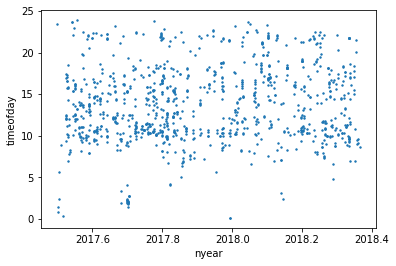

In [ ]:
'''
We're plotting the date against the time of day. s=2 means that the dots are
smaller

The reason we're doing this is to see when the majority of emails come in. It 
seems to be early in the morning.
'''
messages.plot.scatter('nyear','timeofday',s=2)

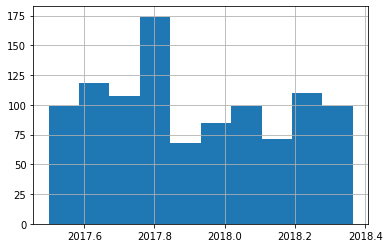

In [60]:
'''
We're seeing when we received the most emails during the year
'''
messages.nyear.hist()

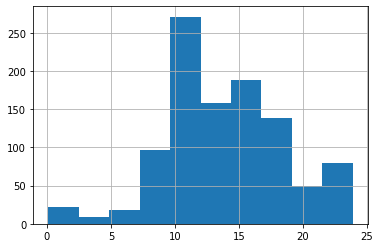

In [62]:
'''
Most active hours, for email, are during the day and just before lunch.
I guess the morning just for drinking coffee :P
'''
messages.timeofday.hist()

In [63]:
'''
Because this column is now a category, we can see the number of emails each day. 
Most are Mon-Wed, hence further proof that Mon-Wed are pure evil.
'''
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

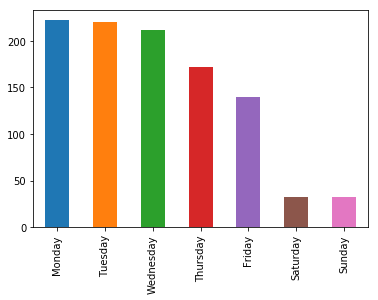

In [ ]:
'''
We're basically showing what we did above. sort=False because we don't want to 
lose the order of the week. If we sort, it would probably sort by number of 
emails per day.
'''
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')